## TP SD 205

Chargement des données 


In [254]:
import numpy as np 
import matplotlib.pyplot as plt

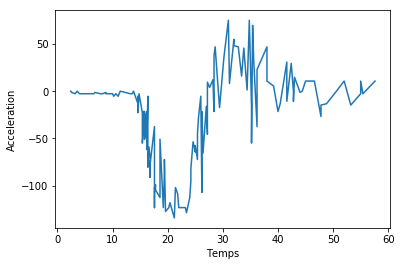

In [255]:
data = np.loadtxt('Motorcycledata.txt')[:,1:]
plt.plot(data[:,0], data[:,1])
plt.ylabel("Acceleration")
plt.xlabel("Temps")
plt.show()

Plus facile de faire tout avec panda 

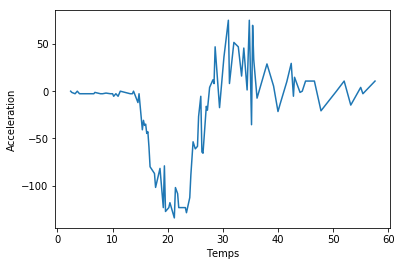

In [256]:
#Reme

data_temp= []
D = []

t_temp = 0
moy = 0
n = 1

for t,v in data:
    if (t == t_temp):
        moy += v
        n += 1
    else:
        D.append(n)
        data_temp.append(list((t_temp, moy/n)))
        moy = v
        n = 1
        t_temp = t
        
D.append(n)
D.pop(0)
data_temp.append(list((t_temp, moy/n)))
data_temp.pop(0)

data = np.array(data_temp)
plt.ylabel("Acceleration")
plt.xlabel("Temps")
plt.plot(data[:,0], data[:,1])
plt.show()

In [257]:
""""def preprocess(data):
    t=[]
    m=[]
    Y=[]
    n=len(data)
    i=0
    
    while i<n-1:
        temp=data[i][0]
        if temp not in t:
            t.append(temp)
            cpteur_i=1
            moyenne_i = data[i][1]
            if data[i+1][0]!=temp:
                m.append(1)
                Y.append(moyenne_i)
        if temp in i :
            while data[i][0] in t:
                cpteur_i+=1
                moyenne_i+=data[i][1]
                i+=1            
            m.append(cpteur_i)
            Y.append(moyenne_i/cpteur_i)
    return t,Y,m"""

'"def preprocess(data):\n    t=[]\n    m=[]\n    Y=[]\n    n=len(data)\n    i=0\n    \n    while i<n-1:\n        temp=data[i][0]\n        if temp not in t:\n            t.append(temp)\n            cpteur_i=1\n            moyenne_i = data[i][1]\n            if data[i+1][0]!=temp:\n                m.append(1)\n                Y.append(moyenne_i)\n        if temp in i :\n            while data[i][0] in t:\n                cpteur_i+=1\n                moyenne_i+=data[i][1]\n                i+=1            \n            m.append(cpteur_i)\n            Y.append(moyenne_i/cpteur_i)\n    return t,Y,m'

### Question 2

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
def somme(x,d,coeff):
    s=0
    for i in range(d):
        s+=coeff[i]*x**i
    return s

In [260]:
def interp_pln(data,degree):
    data=np.array(data)
    t=data[:,0]
    y=data[:,1]
    #Construction of the matrix t, with ti**0, ti**1, ..., ti**degree
    new_t=[]
    for ti in t:
        new_ti=[]
        for k in range(degree):
            new_ti.append(ti**k)
        new_t.append(new_ti)
    #Linear regression
    regressor = LinearRegression(fit_intercept=False)  
    regressor.fit(new_t, y)
    return regressor.coef_

In [261]:
interp_pln(data_temp,15)

array([-1.44056759e-16,  1.01762567e-08,  6.09667306e-12, -7.94235711e-13,
       -1.28174891e-11, -1.87650510e-10, -2.35013246e-09, -2.25693888e-08,
       -1.25649217e-07,  1.74569239e-08, -9.88762358e-10,  2.94702699e-11,
       -4.88641831e-13,  4.27891803e-15, -1.54734424e-17])

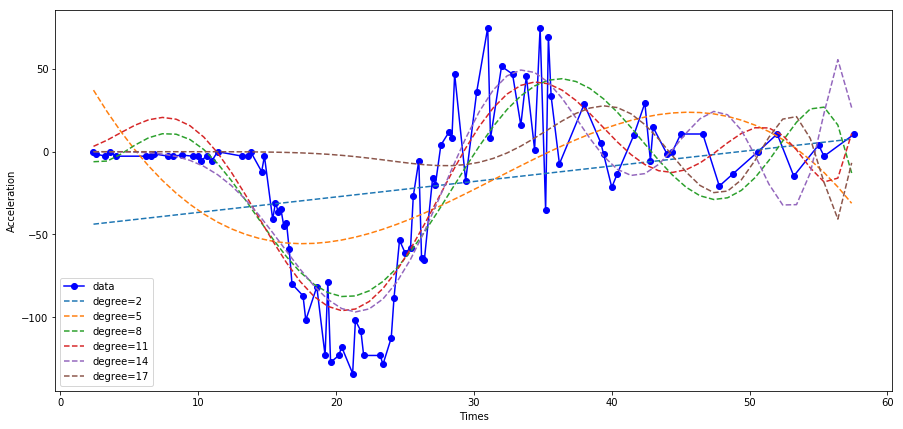

In [262]:
t=data[:,0]
y=data[:,1]
plt.figure(figsize=(15,7))
plt.plot(t,y,label='data',marker='o',color='b')
absc=np.arange(t[0],t[len(t)-1])
for i in range(2,20,3):
    coeffs=interp_pln(data_temp,i)
    ordo=somme(absc,i,coeffs)
    plt.plot(absc,ordo,linestyle='--',label='degree='+str(i))
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.show()  

### Question 3

In [263]:
n=len(t)
h = t[1:]-t[:n-1]
Q = np.zeros((n,n-2))

for j in range(n-2):
    Q[j,j] = 1/h[j]
    Q[j+1,j] = -1/h[j] - 1/h[j+1]
    Q[j+2,j] = 1/h[j+1]

R = np.zeros((n-2,n-2))
for j in range(n-2):
    R[j,j] = 1/3 * (h[j]+h[j+1])
    if j<n-3:
        R[j+1,j] = 1/6*h[j+1]
        R[j,j+1] = 1/6*h[j+1]

K = np.dot(np.dot(Q, np.linalg.inv(R)), Q.T)

print(K)

[[ 1.06361451e+02 -1.53025447e+02  6.77845169e+01 ... -9.61486435e-54
   5.70498807e-54 -7.31408727e-56]
 [-1.53025447e+02  2.28945438e+02 -1.22854482e+02 ...  2.13663652e-53
  -1.26777513e-53  1.62535273e-55]
 [ 6.77845169e+01 -1.22854482e+02  1.40257712e+02 ... -8.14592674e-53
   4.83339267e-53 -6.19665727e-55]
 ...
 [-9.61486435e-54  2.13663652e-53 -8.14592674e-53 ...  2.60328263e+01
  -2.32591000e+01  1.50011667e+00]
 [ 5.70498807e-54 -1.26777513e-53  4.83339267e-53 ... -2.32591000e+01
   2.18128751e+01 -1.70010679e+00]
 [-7.31408727e-56  1.62535273e-55 -6.19665727e-55 ...  1.50011667e+00
  -1.70010679e+00  2.40327709e-01]]


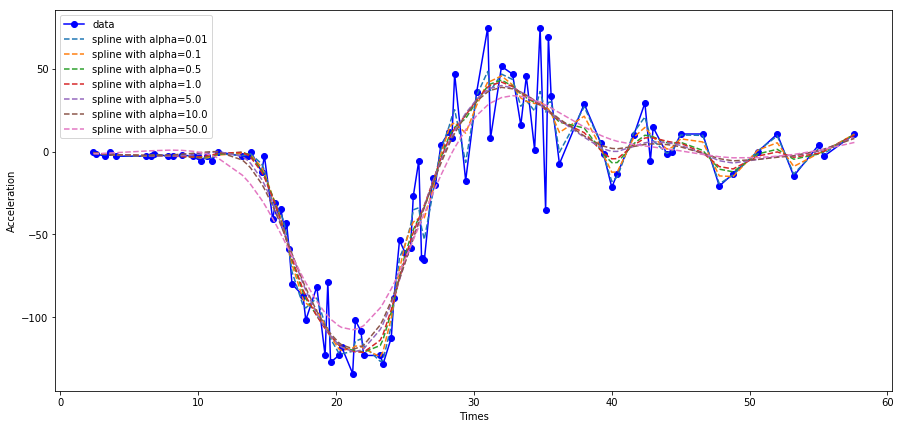

In [266]:
alphas = np.array([0.01,0.1,0.5,1,5,10,50])
plt.figure(figsize=(15,7))
plt.plot(t,y,label='data',marker='o',color='b')
for alpha in alphas: 
    Y_pred = np.dot(np.linalg.inv(np.eye(n)+alpha*K), y)
    plt.plot(t, Y_pred,linestyle='--',label='spline with alpha='+str(alpha))
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.show()  

### Question 4

In [285]:
print(n)
print(K.shape)

def CV(alpha):
    A = np.linalg.inv(np.eye(n)+alpha*K)
    g = np.dot(A,y)
    return (1*n)*np.sum(((y-g)/np.diag(np.eye(n)-A))**2)

94
(94, 94)


In [286]:
alphas = np.array([0.01,0.1,0.5,1,5,10,50])
CV(0.1)

4569673.390095476